In [1]:
conda update -n base -c defaults conda

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
%%sh
pip install gffutils # https://pythonhosted.org/pyfaidx/
pip install pyfaidx # https://pythonhosted.org/gffutils/contents.html
pip install biopython # https://biopython.org
pip install matplotlib # https://matplotlib.org
pip install pandas # https://pandas.pydata.org

In [3]:
#Import biopython module
from Bio import SeqIO

#Define a function for reading through the sequence and count the Cs
def total_c(your_fasta_file):
    count = 0
    length = 0
    for record in SeqIO.parse(your_fasta_file, "fasta"):
        seq = str(record.seq)
        count += seq.count('C')
        length += len(seq)
    c_per = (count / length) * 100

    return count, length, c_per

#Apply the function
fasta_file = 'GRBV.fasta'
total_c_in_seq = (total_c(fasta_file)[0])
C_percentage = str(round((total_c(fasta_file)[2]), 2))
genome_length = str(total_c(fasta_file)[1])
print(f"Number of 'C' in the input genome: {total_c_in_seq}\nThis represents the {C_percentage}% of the GRBV genome ({genome_length} bp)!")

Number of 'C' in the input genome: 511
This represents the 15.94% of the GRBV genome (3206 bp)!


In [4]:
#Import packages and modules
import pandas as pd
import re

#Here I'm creating the function for collecting the data about CpG island for a given genome in fasta format
def cpg_counter(fasta_file):
    total = 0
    cpg = 0
    chg = 0
    chh = 0
    cpg_islands = []
    pattern = re.compile(r'CG|C[ACT]G|C[ACT][ACT]')

    for record in SeqIO.parse(fasta_file, "fasta"):
        seq = str(record.seq)
        matches = pattern.finditer(seq)
        for match in matches:
            total += 1
            if match.group() == 'CG':
                cpg += 1
                island_type = 'CpG'
            elif match.group() == 'CAG' or match.group() == 'CTG' or match.group() == 'CCG':
                chg += 1
                island_type = 'CHG'
            elif len(match.group()) == 3:
                chh += 1
                island_type = 'CHH'
            #Here, the +1 enable us to convert the output coordinates from 0-based to 1-based
            start = match.start() + 1
            end = match.end()
            cpg_islands.append((island_type, start, end))

    return total, cpg, chg, chh, cpg_islands

#Here I'm applying our new the function
file = 'GRBV.fasta'
total, cpg, chg, chh, cpg_islands = cpg_counter(file)

#Now I can create a data frame containing our CpG islands data
df_initial = pd.DataFrame(cpg_islands, columns=['Type', 'Start', 'End'])
output = 'cpg_islands.csv'
df_initial.to_csv(output, index=False)
#Here we print our new data frame
print(df_initial)
print()

#And now we print the counts
print(f"Total number of CpG islands in the FASTA file: {total}")
print(f"Number of CpG islands (CpG): {cpg}")
print(f"Number of CpG islands (CHG): {chg}")
print(f"Number of CpG islands (CHH): {chh}")

    Type  Start   End
0    CHG      2     4
1    CHH      6     8
2    CHH     11    13
3    CpG     20    21
4    CHH     29    31
..   ...    ...   ...
395  CHH   3139  3141
396  CHH   3143  3145
397  CHH   3169  3171
398  CHH   3176  3178
399  CHH   3195  3197

[400 rows x 3 columns]

Total number of CpG islands in the FASTA file: 400
Number of CpG islands (CpG): 105
Number of CpG islands (CHG): 78
Number of CpG islands (CHH): 217


In [5]:
#Assign our second fasta or text file to the variable file
file = '24dpi_GRBV_M.txt' 

#Parse the file in read settings
with open(file, 'r') as file:
    content = file.read()
#Count the number of M
positions = [i + 1 for i, char in enumerate(content) if char == 'M']

#Create data frame with the position of each detected M or methylation in our file
data = {'Position': positions, 'Letter': 'M'}
df_M_position = pd.DataFrame(data)
df_initial = df_initial.rename(columns={'Start': 'Position'})

print(df_M_position)
print(df_initial)

    Position Letter
0          6      M
1          8      M
2         12      M
3         29      M
4         33      M
..       ...    ...
88      2983      M
89      2985      M
90      3016      M
91      3031      M
92      3034      M

[93 rows x 2 columns]
    Type  Position   End
0    CHG         2     4
1    CHH         6     8
2    CHH        11    13
3    CpG        20    21
4    CHH        29    31
..   ...       ...   ...
395  CHH      3139  3141
396  CHH      3143  3145
397  CHH      3169  3171
398  CHH      3176  3178
399  CHH      3195  3197

[400 rows x 3 columns]


In [6]:
#Assign our second fasta or text file to the variable file
file = '24dpi_GRBV_M_Neg.txt' 

#Parse the file in read settings
with open(file, 'r') as file:
    content = file.read()
#Count the number of M
positions = [i + 1 for i, char in enumerate(content) if char == 'M']

#Create data frame with the position of each detected M or methylation in our file
data_Neg = {'Position': positions, 'Letter': 'M'}
df_M_position_Neg = pd.DataFrame(data_Neg)
df_initial = df_initial.rename(columns={'Start': 'Position'})

print(df_M_position_Neg)
print(df_initial)

    Position Letter
0         29      M
1         33      M
2         38      M
3        102      M
4        130      M
..       ...    ...
82      2836      M
83      2843      M
84      2957      M
85      2967      M
86      2978      M

[87 rows x 2 columns]
    Type  Position   End
0    CHG         2     4
1    CHH         6     8
2    CHH        11    13
3    CpG        20    21
4    CHH        29    31
..   ...       ...   ...
395  CHH      3139  3141
396  CHH      3143  3145
397  CHH      3169  3171
398  CHH      3176  3178
399  CHH      3195  3197

[400 rows x 3 columns]


In [7]:
#Merge the two
final_df = pd.merge(df_initial, df_M_position, on='Position')
df = final_df.drop('Letter', axis=1)
df = df.drop('End', axis=1)

df.head()

,Type,Position
0,CHH,6
1,CHH,29
2,CpG,33
3,CHH,38
4,CpG,102


In [8]:
#Merge the two
final_df_Neg = pd.merge(df_initial, df_M_position_Neg, on='Position')
df_Neg = final_df_Neg.drop('Letter', axis=1)
df_Neg = df_Neg.drop('End', axis=1)

df_Neg.head()

,Type,Position
0,CHH,29
1,CpG,33
2,CHH,38
3,CpG,102
4,CHH,130


In [9]:
#Here I'm creating a dictionary with the data for each column
data = {'Name': ['Hotspot 1', 'Hotspot 2', 'Hotspot 3', 'Hotspot 4', 'Hotspot 5', 'Hotspot 6', 'Hotspot 7', 'Hotspot 8', 'Hotspot 9'],
        'Start': [222, 377, 552, 732, 871, 1496, 1651, 2631, 2952],
        'End': [369, 536, 721, 851, 1201, 1636, 1751, 2831, 3051]}

#Dictionary to dataframe
features = pd.DataFrame(data)

features

,Name,Start,End
0,Hotspot 1,222,369
1,Hotspot 2,377,536
2,Hotspot 3,552,721
3,Hotspot 4,732,851
4,Hotspot 5,871,1201
5,Hotspot 6,1496,1636
6,Hotspot 7,1651,1751
7,Hotspot 8,2631,2831
8,Hotspot 9,2952,3051


In [10]:
#Create an empty data frame to store the results from this code cell, with three columns named type, position, name
df_result = pd.DataFrame(columns=['Type', 'Position', 'Name'])

#Iterate over each row in our data frame (df) containing the position and type of sites of the methylations
for index, row in df.iterrows():
    position = row['Position']
    
    #Iterate over each row in the features data frame to use the coordinates to assign our methylations from df to the features contained in the features data frame
    for index2, row2 in features.iterrows():
        start = row2['Start']
        end = row2['End']
        
        #If loop to check if the given position falls within the range provided with the genomic features
        if start <= position <= end:
            #Create a new temporary data frame with the Type (methylation site), Position, and Name (of the feature)
            temp_df = pd.DataFrame({'Type': [row['Type']],
                                    'Position': [row['Position']],
                                    'Name': [row2['Name']]})
            
            #Concatenate the temporary data frame with df_result
            df_result = pd.concat([df_result, temp_df], ignore_index=True)
            break  #Break out of the inner loop we created once we find a match

print(df_result)

   Type Position       Name
0   CHH      410  Hotspot 2
1   CHG      425  Hotspot 2
2   CHG      458  Hotspot 2
3   CHH      464  Hotspot 2
4   CHH      475  Hotspot 2
5   CHG      486  Hotspot 2
6   CHH      494  Hotspot 2
7   CpG      497  Hotspot 2
8   CpG      512  Hotspot 2
9   CHH      662  Hotspot 3
10  CHH      666  Hotspot 3
11  CpG      762  Hotspot 4
12  CHG      780  Hotspot 4
13  CpG      788  Hotspot 4
14  CpG      791  Hotspot 4
15  CHH      800  Hotspot 4
16  CHH      829  Hotspot 4
17  CHH      956  Hotspot 5
18  CHH      967  Hotspot 5
19  CHH      986  Hotspot 5
20  CHH     1022  Hotspot 5
21  CHH     1037  Hotspot 5
22  CHG     1047  Hotspot 5
23  CHH     1057  Hotspot 5
24  CpG     1075  Hotspot 5
25  CHH     1092  Hotspot 5
26  CpG     1098  Hotspot 5
27  CpG     1115  Hotspot 5
28  CpG     1127  Hotspot 5
29  CHG     1172  Hotspot 5
30  CHH     1187  Hotspot 5
31  CHH     1194  Hotspot 5
32  CHH     1564  Hotspot 6
33  CHH     1570  Hotspot 6
34  CHH     1574  Ho

In [11]:
#Create an empty data frame to store the results from this code cell, with three columns named type, position, name
df_result_Neg = pd.DataFrame(columns=['Type', 'Position', 'Name'])

#Iterate over each row in our data frame (df) containing the position and type of sites of the methylations
for index, row in df_Neg.iterrows():
    position = row['Position']
    
    #Iterate over each row in the features data frame to use the coordinates to assign our methylations from df to the features contained in the features data frame
    for index2, row2 in features.iterrows():
        start = row2['Start']
        end = row2['End']
        
        #If loop to check if the given position falls within the range provided with the genomic features
        if start <= position <= end:
            #Create a new temporary data frame with the Type (methylation site), Position, and Name (of the feature)
            temp_df_Neg = pd.DataFrame({'Type': [row['Type']],
                                    'Position': [row['Position']],
                                    'Name': [row2['Name']]})
            
            #Concatenate the temporary data frame with df_result
            df_result_Neg = pd.concat([df_result_Neg, temp_df_Neg], ignore_index=True)
            break  #Break out of the inner loop we created once we find a match

print(df_result_Neg)

   Type Position       Name
0   CHH      410  Hotspot 2
1   CHG      425  Hotspot 2
2   CHG      458  Hotspot 2
3   CHH      464  Hotspot 2
4   CHH      475  Hotspot 2
5   CHG      486  Hotspot 2
6   CHH      494  Hotspot 2
7   CpG      497  Hotspot 2
8   CpG      512  Hotspot 2
9   CHH      662  Hotspot 3
10  CHH      666  Hotspot 3
11  CpG      755  Hotspot 4
12  CpG      788  Hotspot 4
13  CpG      791  Hotspot 4
14  CHH      800  Hotspot 4
15  CpG      803  Hotspot 4
16  CHH      829  Hotspot 4
17  CHH      956  Hotspot 5
18  CpG      963  Hotspot 5
19  CHH      967  Hotspot 5
20  CpG      976  Hotspot 5
21  CHH      986  Hotspot 5
22  CHH     1022  Hotspot 5
23  CHG     1047  Hotspot 5
24  CHH     1057  Hotspot 5
25  CpG     1075  Hotspot 5
26  CHH     1092  Hotspot 5
27  CpG     1098  Hotspot 5
28  CpG     1115  Hotspot 5
29  CpG     1127  Hotspot 5
30  CHG     1172  Hotspot 5
31  CHH     1187  Hotspot 5
32  CHH     1194  Hotspot 5
33  CHH     1564  Hotspot 6
34  CHH     1570  Ho

<Figure size 2000x1200 with 0 Axes>

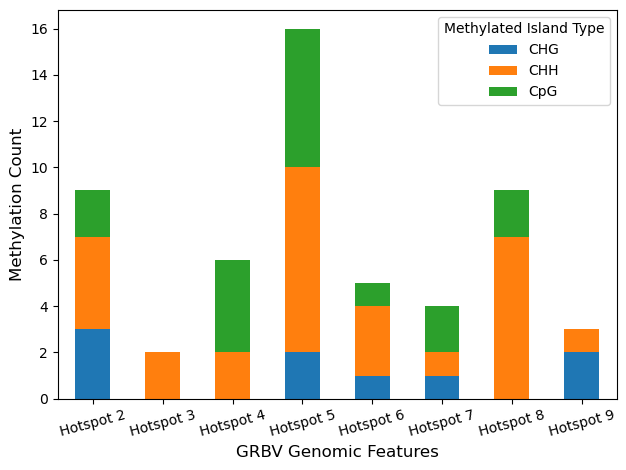

In [12]:
import matplotlib.pyplot as plt

# This code groups our data by Name and Type and gets their count from df_result
grouped_Neg = df_result_Neg.groupby(['Name', 'Type']).size().reset_index(name='Count')

# Produce a pivot table to get Type as columns and Name as index
pivot_table_Neg = grouped_Neg.pivot(index='Name', columns='Type', values='Count').fillna(0)

# Create a new figure before plotting
plt.figure(figsize=(20, 12))

# Plot the graph
pivot_table_Neg.plot(kind='bar', stacked=True)
plt.ylabel('Methylation Count', fontsize=12)
plt.xlabel('GRBV Genomic Features', fontsize=12)
plt.legend(title='Methylated Island Type')
plt.xticks(rotation=15)
plt.tight_layout()  # Arrange the plot elements properly
plt.savefig("neg_1.png", format='png')  # Save the plot as PNG
plt.show()


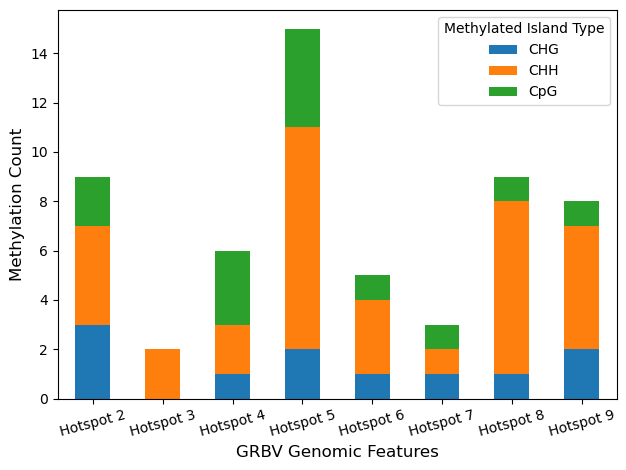

In [13]:
import matplotlib.pyplot as plt

#This code groups our data by Name and Type and get their count from df_result
grouped = df_result.groupby(['Name', 'Type']).size().reset_index(name='Count')

#Produce a pivot table to get Type as columns and Name as index
pivot_table = grouped.pivot(index='Name', columns='Type', values='Count').fillna(0)

#Plot the graph
pivot_table.plot(kind='bar', stacked=True)
plt.ylabel('Methylation Count', fontsize=12)
plt.xlabel('GRBV Genomic Features', fontsize=12)
plt.legend(title='Methylated Island Type')
plt.xticks(rotation=15)
plt.tight_layout()  # Arrange the plot elements properly
plt.savefig("pos_1.png", format='png')  # Save the plot as PNG
plt.show()

In [14]:
#Here I'm creating a dictionary with the data for each column
data2 = {'Name': ['Structural', 'Non Structural', 'LIR'],
        'Start': [517, 1898, 1],
        'End': [1737, 3045, 292]}

#Dictionary to dataframe
features2 = pd.DataFrame(data2)

features2

,Name,Start,End
0,Structural,517,1737
1,Non Structural,1898,3045
2,LIR,1,292


In [15]:
#As before, create an empty data frame to store the results
df_result2 = pd.DataFrame(columns=['Type', 'Position', 'Name'])

#Now iterate over each row in df...
for index, row in df.iterrows():
    position = row['Position']
    
    #...and over each row in features2
    for index2, row2 in features2.iterrows():
        start = row2['Start']
        end = row2['End']
        
        #Position-to-range mapping
        if start <= position <= end:
            #New temporary data frame
            temp_df2 = pd.DataFrame({'Type': [row['Type']],
                                    'Position': [row['Position']],
                                    'Name': [row2['Name']]})
            
            #Concatenation and results data frame
            df_result2 = pd.concat([df_result2, temp_df2], ignore_index=True)
            break

print(df_result2)

   Type Position            Name
0   CHH        6             LIR
1   CHH       29             LIR
2   CpG       33             LIR
3   CHH       38             LIR
4   CpG      102             LIR
..  ...      ...             ...
63  CHG     2978  Non Structural
64  CHH     2983  Non Structural
65  CpG     3016  Non Structural
66  CHH     3031  Non Structural
67  CHH     3034  Non Structural

[68 rows x 3 columns]


<Figure size 2000x1200 with 0 Axes>

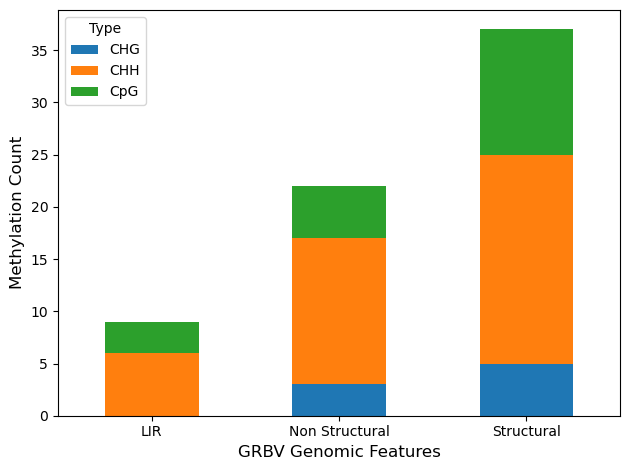

In [16]:
import matplotlib.pyplot as plt

# This code groups our data by Name and Type and gets their count from df_result
grouped2 = df_result2.groupby(['Name', 'Type']).size().reset_index(name='Count')

# Produce a pivot table to get Type as columns and Name as index
pivot_table2 = grouped2.pivot(index='Name', columns='Type', values='Count').fillna(0)

# Create a new figure
plt.figure(figsize=(20, 12))

# Plot the graph
pivot_table2.plot(kind='bar', stacked=True)
plt.xlabel('GRBV Genomic Features', fontsize=12)
plt.ylabel('Methylation Count', fontsize=12)
plt.legend(title='Type')
plt.xticks(rotation=0)
plt.tight_layout()  # Arrange the plot elements properly
plt.savefig("pos_2.png", format='png')  # Save the plot as PNG

# Show the plot
plt.show()


In [17]:
#As before, create an empty data frame to store the results
df_result2_Neg = pd.DataFrame(columns=['Type', 'Position', 'Name'])

#Now iterate over each row in df...
for index, row in df_Neg.iterrows():
    position = row['Position']
    
    #...and over each row in features2
    for index2, row2 in features2.iterrows():
        start = row2['Start']
        end = row2['End']
        
        #Position-to-range mapping
        if start <= position <= end:
            #New temporary data frame
            temp_df2_Neg = pd.DataFrame({'Type': [row['Type']],
                                    'Position': [row['Position']],
                                    'Name': [row2['Name']]})
            
            #Concatenation and results data frame
            df_result2_Neg = pd.concat([df_result2_Neg, temp_df2_Neg], ignore_index=True)
            break

print(df_result2_Neg)

   Type Position            Name
0   CHH       29             LIR
1   CpG       33             LIR
2   CHH       38             LIR
3   CpG      102             LIR
4   CHH      130             LIR
..  ...      ...             ...
60  CpG     2836  Non Structural
61  CHH     2843  Non Structural
62  CHH     2957  Non Structural
63  CHG     2967  Non Structural
64  CHG     2978  Non Structural

[65 rows x 3 columns]


<Figure size 2000x1200 with 0 Axes>

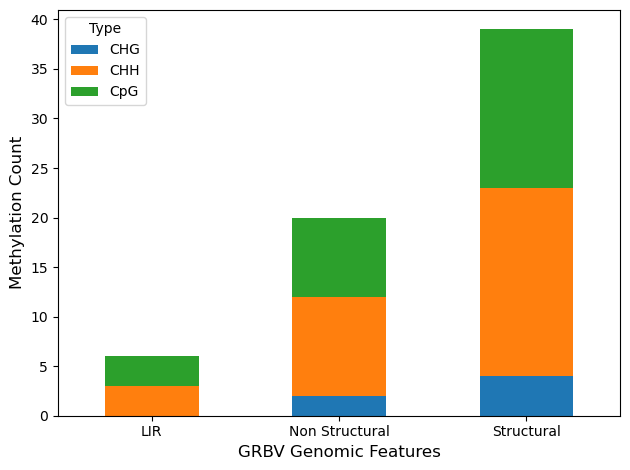

In [18]:
#This code groups our data by Name and Type and get their count from df_result
grouped2_Neg = df_result2_Neg.groupby(['Name', 'Type']).size().reset_index(name='Count')

# Pivot table x indexing step
pivot_table2_Neg = grouped2_Neg.pivot(index='Name', columns='Type', values='Count').fillna(0)

# Create a new figure
plt.figure(figsize=(20, 12))

# Plot the graph
pivot_table2_Neg.plot(kind='bar', stacked=True)
plt.xlabel('GRBV Genomic Features', fontsize=12)
plt.ylabel('Methylation Count', fontsize=12)
plt.legend(title='Type')
plt.xticks(rotation=0)
plt.tight_layout()  # Arrange the plot elements properly
plt.savefig("neg_2.png", format='png')  # Save the plot as PNG

# Show the plot
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Here I'm creating a dictionary with the data for each column
data2 = {'Name': ['Structural', 'Non Structural', 'LIR'],
        'Start': [517, 1898, 1],
        'End': [1737, 3045, 292]}

# Dictionary to dataframe
features2 = pd.DataFrame(data2)

# Create an empty dataframe to store results
df_result2 = pd.DataFrame(columns=['Type', 'Position', 'Name'])

# Iterate over each row in the methylations dataframe (df_Neg)
for index, row in df_Neg.iterrows():
    position = row['Position']
    
    # Iterate over each row in the features dataframe to find the corresponding genomic feature
    for index2, row2 in features2.iterrows():
        start = row2['Start']
        end = row2['End']
        
        # If loop to check if the given position falls within the range provided with the genomic features
        if start <= position <= end:
            # Create a new temporary dataframe with the Type (methylation site), Position, and Name (of the feature)
            temp_df2 = pd.DataFrame({'Type': [row['Type']],
                                    'Position': [row['Position']],
                                    'Name': [row2['Name']]})
            
            # Concatenate the temporary dataframe with df_result2
            df_result2 = pd.concat([df_result2, temp_df2], ignore_index=True)
            break  # Break out of the inner loop once we find a match

# Group the data by Name, Type, and Position and get the count of methylation events
grouped2 = df_result2.groupby(['Name', 'Type', 'Position']).size().reset_index(name='Count')

# Merge with features2 dataframe to get the length of each feature
grouped2 = grouped2.merge(features2, on='Name', how='left')

# Calculate the percentage of methylation count relative to the length of each genomic feature
grouped2['Feature_Length'] = grouped2['End'] - grouped2['Start'] + 1
grouped2['Percentage'] = (grouped2['Count'] / grouped2['Feature_Length']) * 100

# Produce a pivot table to get Type as columns and Name as index
pivot_table2 = grouped2.pivot_table(index='Name', columns='Type', values='Percentage', aggfunc='sum').fillna(0)

# Create a new figure
plt.figure(figsize=(20, 12))

# Plot the graph
pivot_table2.plot(kind='bar', stacked=True)
plt.xlabel('GRBV Genomic Features', fontsize=12)
plt.ylabel('Percentage of Methylation', fontsize=12)
plt.legend(title='Type')
plt.xticks(rotation=0)
plt.tight_layout()  # Arrange the plot elements properly
plt.savefig("pos_2.png", format='png')  # Save the plot as PNG

# Show the plot
plt.show()


KeyError: 'Feature_Length'

<Figure size 2000x1200 with 0 Axes>

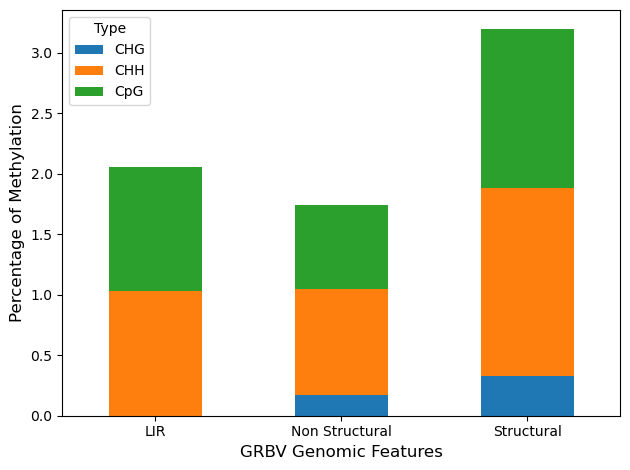

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Here I'm creating a dictionary with the data for each column
data2 = {'Name': ['Structural', 'Non Structural', 'LIR'],
        'Start': [517, 1898, 1],
        'End': [1737, 3045, 292]}

# Dictionary to dataframe
features2 = pd.DataFrame(data2)

# Create an empty dataframe to store results
df_result2 = pd.DataFrame(columns=['Type', 'Position', 'Name'])

# Iterate over each row in the methylations dataframe (df_Neg)
for index, row in df_Neg.iterrows():
    position = row['Position']
    
    # Iterate over each row in the features dataframe to find the corresponding genomic feature
    for index2, row2 in features2.iterrows():
        start = row2['Start']
        end = row2['End']
        
        # If loop to check if the given position falls within the range provided with the genomic features
        if start <= position <= end:
            # Create a new temporary dataframe with the Type (methylation site), Position, and Name (of the feature)
            temp_df2 = pd.DataFrame({'Type': [row['Type']],
                                    'Position': [row['Position']],
                                    'Name': [row2['Name']]})
            
            # Concatenate the temporary dataframe with df_result2
            df_result2 = pd.concat([df_result2, temp_df2], ignore_index=True)
            break  # Break out of the inner loop once we find a match

# Group the data by Name, Type, and Position and get the count of methylation events
grouped2 = df_result2.groupby(['Name', 'Type', 'Position']).size().reset_index(name='Count')

# Merge with features2 dataframe to get the length of each feature
grouped2 = grouped2.merge(features2, on='Name', how='left')

# Calculate the percentage of methylation count relative to the length of each genomic feature
grouped2['Feature_Length'] = grouped2['End'] - grouped2['Start'] + 1
grouped2['Percentage'] = (grouped2['Count'] / grouped2['Feature_Length']) * 100

# Produce a pivot table to get Type as columns and Name as index
pivot_table2 = grouped2.pivot_table(index='Name', columns='Type', values='Percentage', aggfunc='sum').fillna(0)

# Create a new figure
plt.figure(figsize=(20, 12))

# Plot the graph
pivot_table2.plot(kind='bar', stacked=True)
plt.xlabel('GRBV Genomic Features', fontsize=12)
plt.ylabel('Percentage of Methylation', fontsize=12)
plt.legend(title='Type')
plt.xticks(rotation=0)
plt.tight_layout()  # Arrange the plot elements properly
plt.savefig("neg_2.png", format='png')  # Save the plot as PNG

# Show the plot
plt.show()
